In [27]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

In [28]:
#Import the 800MB file from AWS s3 bucket
data = pd.read_csv('aggdata.csv')

In [29]:
#data['Domestic'].unique()
data.dropna(how='any', inplace=True)


In [30]:
data.head()

,avg_incident_count,Community Area Number,Primary Type,Temp Avg (° F)
0,1.0,1,ARSON,11
1,1.0,1,ARSON,20
2,1.0,1,ARSON,25
3,1.0,1,ARSON,27
4,1.0,1,ARSON,28


In [31]:
df = data.groupby('Primary Type').nunique()
df.sort_values(by=['avg_incident_count'])

,avg_incident_count,Community Area Number,Primary Type,Temp Avg (° F)
Primary Type,,,,
NON-CRIMINAL (SUBJECT SPECIFIED),1,8,1,8
NON - CRIMINAL,1,27,1,29
PUBLIC INDECENCY,1,42,1,54
NON-CRIMINAL,1,51,1,63
OTHER NARCOTIC VIOLATION,2,27,1,37
HUMAN TRAFFICKING,2,29,1,38
OBSCENITY,3,75,1,77
STALKING,4,77,1,92
CONCEALED CARRY LICENSE VIOLATION,4,53,1,79


In [32]:
data = data[data['Primary Type'].isin(['ASSAULT', 'NARCOTICS','CRIMINAL DAMAGE','BATTERY','THEFT'])]
data.describe()

,avg_incident_count,Community Area Number,Temp Avg (° F)
count,34826.000000,34826.000000,34826.000000
mean,2.035468,39.088239,44.422500
std,1.543356,22.169740,26.774111
min,1.000000,1.000000,-16.000000
25%,1.200000,20.000000,22.000000
50%,1.562500,39.000000,45.000000
75%,2.222200,58.000000,67.000000
max,20.222200,77.000000,93.000000


In [33]:
data.head()

,avg_incident_count,Community Area Number,Primary Type,Temp Avg (° F)
27,1.0000,1,ASSAULT,-16
28,1.0000,1,ASSAULT,-10
29,1.0000,1,ASSAULT,-9
30,1.0000,1,ASSAULT,-4
31,1.6667,1,ASSAULT,0


In [34]:
data.isna().sum()

avg_incident_count       0
Community Area Number    0
Primary Type             0
Temp Avg (° F)           0
dtype: int64

In [35]:
#rename the temp column
data= data.rename(columns={data.columns[3]: "temp" })
data.head()

,avg_incident_count,Community Area Number,Primary Type,temp
27,1.0000,1,ASSAULT,-16
28,1.0000,1,ASSAULT,-10
29,1.0000,1,ASSAULT,-9
30,1.0000,1,ASSAULT,-4
31,1.6667,1,ASSAULT,0


In [36]:
#Lets create dummy variables for the community areas and primary type
#first lets copy the frame to not have to reload everything

data=pd.get_dummies(data[["Primary Type","temp","avg_incident_count"]])
#y = data['incidents'].values.reshape(-1,1)
data

,temp,avg_incident_count,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_CRIMINAL DAMAGE,Primary Type_NARCOTICS,Primary Type_THEFT
27,-16,1.0000,1,0,0,0,0
28,-10,1.0000,1,0,0,0,0
29,-9,1.0000,1,0,0,0,0
30,-4,1.0000,1,0,0,0,0
31,0,1.6667,1,0,0,0,0
32,1,1.0000,1,0,0,0,0
33,2,1.3333,1,0,0,0,0
34,3,1.5000,1,0,0,0,0
35,4,1.5000,1,0,0,0,0
36,5,1.4000,1,0,0,0,0


In [37]:
#Split into test and train
train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset=data.drop(train_dataset.index)

In [38]:
train_dataset.count()

temp                            27861
avg_incident_count              27861
Primary Type_ASSAULT            27861
Primary Type_BATTERY            27861
Primary Type_CRIMINAL DAMAGE    27861
Primary Type_NARCOTICS          27861
Primary Type_THEFT              27861
dtype: int64

In [39]:
test_dataset.count()

temp                            6965
avg_incident_count              6965
Primary Type_ASSAULT            6965
Primary Type_BATTERY            6965
Primary Type_CRIMINAL DAMAGE    6965
Primary Type_NARCOTICS          6965
Primary Type_THEFT              6965
dtype: int64

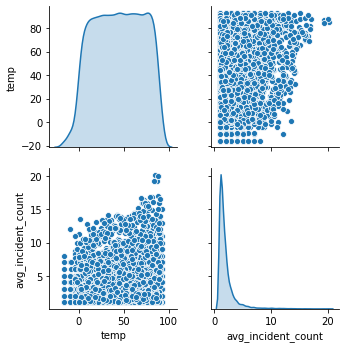

In [40]:
#make some plots
sns.pairplot(train_dataset[["temp", "avg_incident_count"]], diag_kind="kde")

In [41]:
###########3
##############HAVING ISSUES WITH THE SCALING/NORMALIZING. MIGHT NEED CODE FROM CLASS FOR THIS PART.....
#GOING TO KEEP DEVELOPING MODEL WITHOUT normalizing scaling for now
train_stats = train_dataset.describe()
train_stats.pop("avg_incident_count")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
temp,27861.0,44.483938,26.744615,-16.0,22.0,45.0,67.0,93.0
Primary Type_ASSAULT,27861.0,0.196834,0.397613,0.0,0.0,0.0,0.0,1.0
Primary Type_BATTERY,27861.0,0.205197,0.403853,0.0,0.0,0.0,0.0,1.0
Primary Type_CRIMINAL DAMAGE,27861.0,0.202613,0.401954,0.0,0.0,0.0,0.0,1.0
Primary Type_NARCOTICS,27861.0,0.187466,0.390292,0.0,0.0,0.0,0.0,1.0
Primary Type_THEFT,27861.0,0.207889,0.405804,0.0,0.0,0.0,0.0,1.0


In [42]:
##########3Split the Feature Lables --- What we are trying to predict
training_labels=train_dataset.pop('avg_incident_count')
test_labels=test_dataset.pop('avg_incident_count')

In [43]:
training_labels.head()

39177     4.2031
74582     1.3571
113915    1.0000
52343     1.9118
27020     1.3333
Name: avg_incident_count, dtype: float64

In [44]:
########################BUILD THE MODEL##################
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [45]:
model=build_model()

W0720 09:25:09.386706  6968 deprecation.py:506] From C:\Users\Jonas\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [47]:
#test the model with a batch of 10
#once we normalize the data we need to  use the normed below....!!!!!!!!!!!!!!!!!!!
##################33
# example_batch = normed_train_data[:10]
# example_result = model.predict(example_batch)
# example_result
###################

example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[1.9469535 ],
       [1.2896781 ],
       [1.7313293 ],
       [1.5055789 ],
       [0.1672645 ],
       [2.2000122 ],
       [1.5519845 ],
       [1.8539274 ],
       [0.22183156],
       [1.991859  ]], dtype=float32)

In [48]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  train_dataset, training_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [49]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.135491,0.861049,2.135491,2.194831,0.858478,2.194831,995
996,2.134241,0.859576,2.134241,2.202498,0.910068,2.202498,996
997,2.132523,0.860696,2.132523,2.194438,0.875080,2.194438,997
998,2.131049,0.860152,2.131049,2.215490,0.825113,2.215490,998
999,2.131727,0.859725,2.131727,2.207668,0.857822,2.207668,999


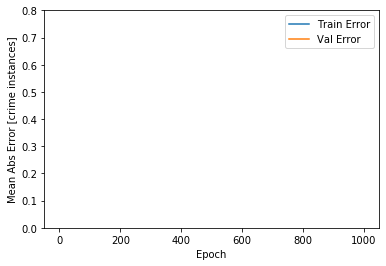

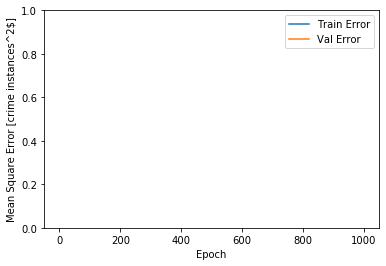

In [50]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [crime instances]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,0.8])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [crime instances^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(history)

In [51]:
#lets test on the Data
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} incidents".format(mae))

Testing set Mean Abs Error:  0.85 incidents


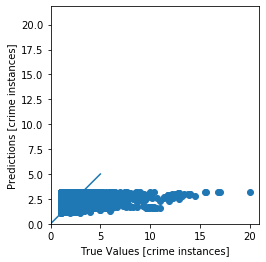

In [58]:
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [crime instances]')
plt.ylabel('Predictions [crime instances]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])

_ = plt.plot([-5, 5], [-5, 5])

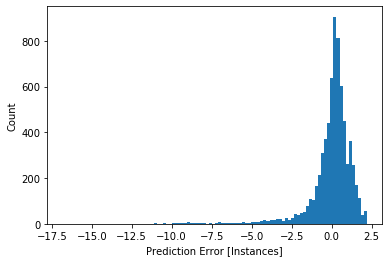

In [53]:
error = test_predictions - test_labels
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error [Instances]")
_ = plt.ylabel("Count")

In [54]:
model.save("agg_data_top5.hs")

In [70]:
##########################This needs to be worked on. We should be able to use model.predcit and feed it an Arry consiting of
## temperature and crime type dummies. The output should be number of crimes predicted by temp and type

# example_batch = train_dataset[:10]
# example_result = model.predict(example_batch)
to_predcit = ([76,1,0,0,0,0])
#This needs to be worked on. We should
model.predict(to_predcit)

AttributeError: 'list' object has no attribute 'reshape'